# Netzwerke visualisieren

Für die Visualisierung von Netzwerken stehen unterschiedliche Python-Bibliotheken zur Verfügung. Diese reichen von statischen bis dynamischen Visualisierungen. 

- Mayank (2021): Netzwerkvisualisierung mit Python. https://towardsdatascience.com/visualizing-networks-in-python-d70f4cbeb259
- NetworkX developert (2014-2024): NetworkX. Network Analysis in Python. https://networkx.org/
- Plotly:  https://plotly.com/python/network-graphs/
- PyVis: https://pyvis.readthedocs.io/en/latest/index.html

In diesem Notebook wird NetworkX für die Netzwerkvisualisierung verwendet. Dafür benötigen wir die aktuellste Version: `pip install networkx` oder `pip install networkx --upgrade`




In [1]:
# import networkx 
import networkx as nx

# import matplotlib.pyplot
import matplotlib.pyplot as plt #zeigt die Visualisierung, die wir mit networkx erzeugen


In [2]:
#Graphentypen
#Graph-Konstruktor, einfacher, ungerichteter Graph
g = nx.Graph()

#gerichteter Graph
g = nx.DiGraph() 

#multiple Kanten zwischen Knoten; Graph in unterschiedliche Richtungen
g= nx.MultiGraph() 

#gerichteter  version 
g= nx.MultiDiGraph()

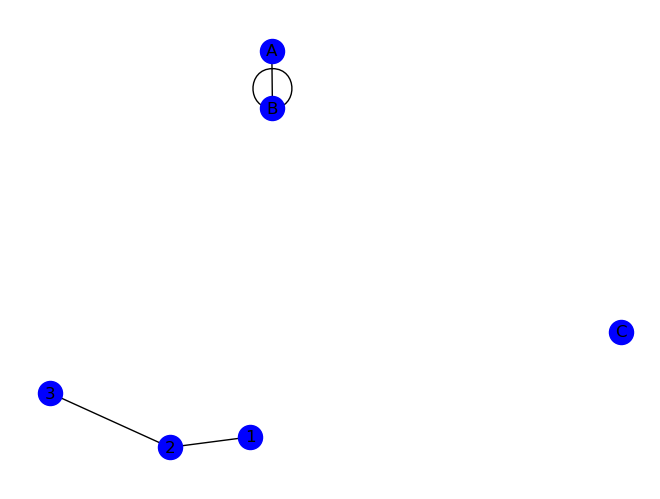

In [3]:
#Knoten und Kanten erstellen, Graph ausgeben
g = nx.Graph()

g.add_edge(1, 2, weight=0.9)
g.add_edge(2, 3, weight=0.2)

g.add_edge("A", "B")
g.add_edge("B", "B")
g.add_node("C")


nx.draw_spring(g, with_labels=True, node_color='blue')
plt.show()

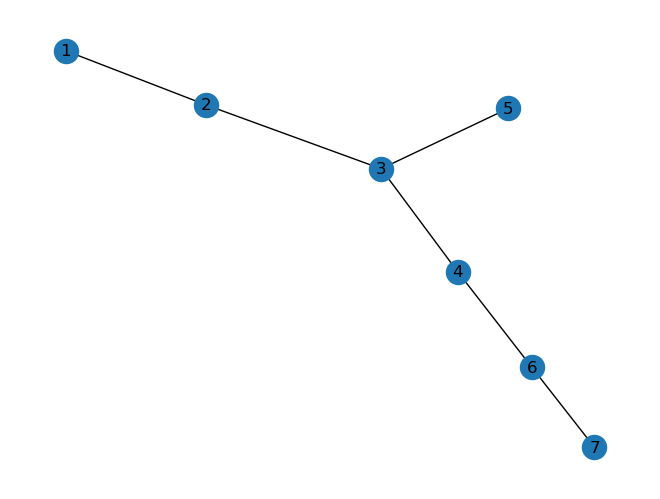

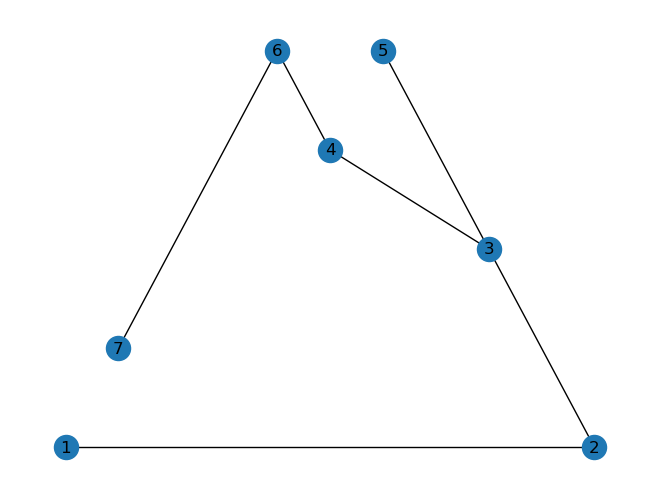

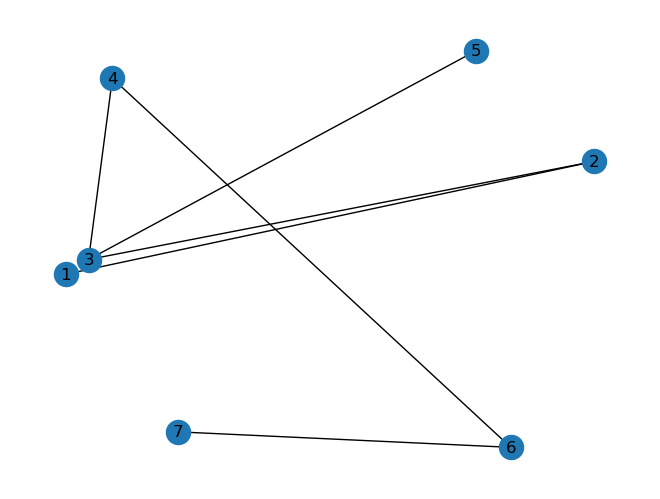

In [4]:
#Kanten aus einer Liste erzeugen

#Unterschiedliche Layouts verwenden

#draw_circular
#draw_shell (konzentrischer Kreis)
#planar (Kanten überkreuzen sich nicht, daher nicht immer verwendbar)
#spectral
#random


edge_list = [(1,2), (2, 3), (3, 4), (3, 5), (4, 6), (6, 7)]

g = nx.Graph()
g.add_edges_from(edge_list)

nx.draw_spring(g, with_labels=True)
plt.show()

nx.draw_planar(g, with_labels=True)
plt.show()

nx.draw_random(g, with_labels=True)
plt.show()

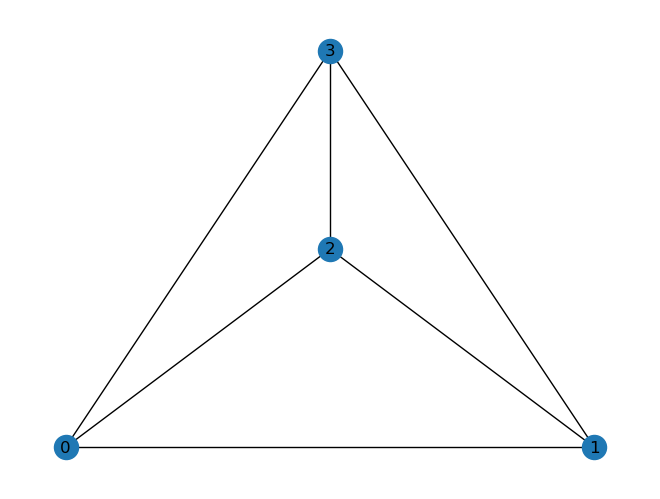

In [5]:
# Kompletten Graphen erstellen

# g = nx.complete_graph(5) -  nicht möglich mit dem Layout planar 

g = nx.complete_graph(4)

nx.draw_planar(g, with_labels=True)
plt.show()

3
1
2


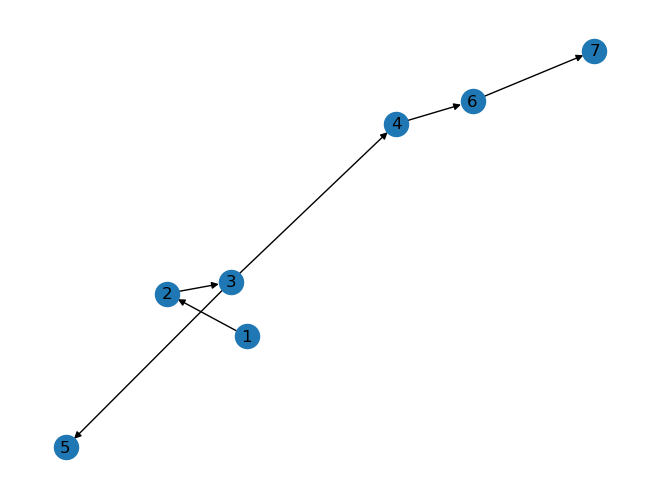

In [6]:
edge_list = [(1,2), (2, 3), (3, 4), (3, 5), (4, 6), (6, 7)]

g = nx.DiGraph()
g.add_edges_from(edge_list)

print(dict(g.degree)[3])
print(dict(g.in_degree)[3])
print(dict(g.out_degree)[3])

nx.draw_spring(g, with_labels=True)
plt.show()


[2, 3, 4]
{1: 0.125, 2: 0.375, 3: 0.375, 4: 0.375, 5: 0.125, 6: 0.25, 7: 0.125, 8: 0.25, 9: 0.25}
{1: 0.0, 2: 0.3214285714285714, 3: 0.46428571428571425, 4: 0.5, 5: 0.0, 6: 0.25, 7: 0.0, 8: 0.07142857142857142, 9: 0.10714285714285714}


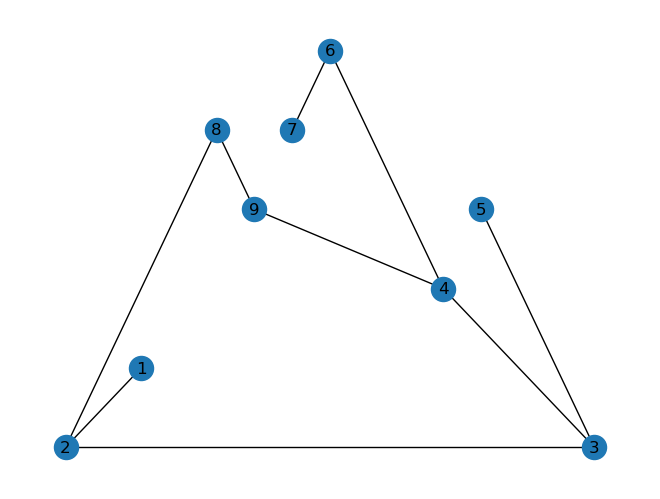

In [7]:
#den kürzesten Pfad finden und zwei Zentralitätsmaße ausgeben

edge_list = [(1,2), (2,3), (3,4), (3,5), (4,6), (6,7), (2, 8), (8,9), (9,4)]

g = nx.Graph()

g.add_edges_from(edge_list)

print(nx.shortest_path(g, 2, 4))

print(nx.degree_centrality(g))
print(nx.betweenness_centrality(g))

nx.draw_planar(g, with_labels=True)
plt.show()


{0: 0.4, 1: 0.4, 2: 0.4, 3: 0.4, 4: 0.5, 'A': 0.5, 'B': 0.4, 'C': 0.4, 'D': 0.4, 'E': 0.4, 'X': 0.2}
{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.5333333333333333, 'A': 0.5333333333333333, 'B': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'X': 0.5555555555555556}
{0: 0.4, 1: 0.4, 2: 0.4, 3: 0.4, 4: 0.5263157894736842, 'A': 0.5263157894736842, 'B': 0.4, 'C': 0.4, 'D': 0.4, 'E': 0.4, 'X': 0.5555555555555556}


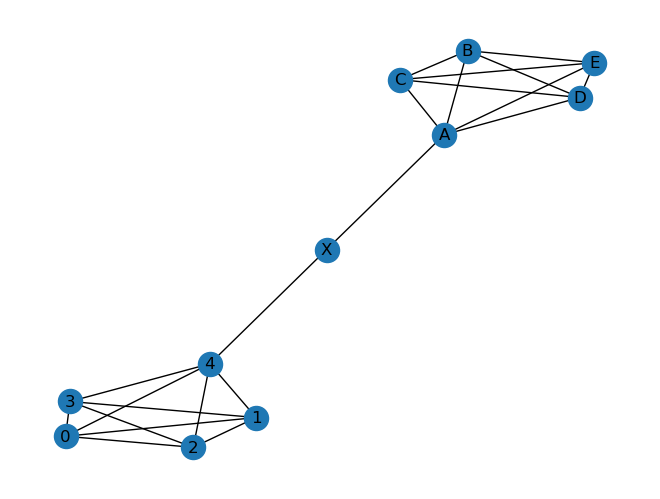

In [8]:
#Zentralitäten bei Graphen, die durch einen Konnektor miteinander verbunden werden. 

G1 = nx.complete_graph(5)
G2 = nx.complete_graph(5)

G2 = nx.relabel_nodes(G2, {0: "A", 1: "B", 2: "C", 3: "D", 4: "E"})

G_connector = nx.from_edgelist([(4, 'X'), ("A", "X")])

G = nx.compose_all([G1, G2, G_connector])

print(nx.degree_centrality(G)) #Anzahl der Kanten
print(nx.betweenness_centrality(G)) #Wie häufig ein Knoten zwischen anderen liegt
print(nx.closeness_centrality(G))

nx.draw_spring(G, with_labels=True)
plt.show()


C:\Users\semlakm\AppData\Local\Temp\ipykernel_6412\2941183002.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('hsv', len(group_names))


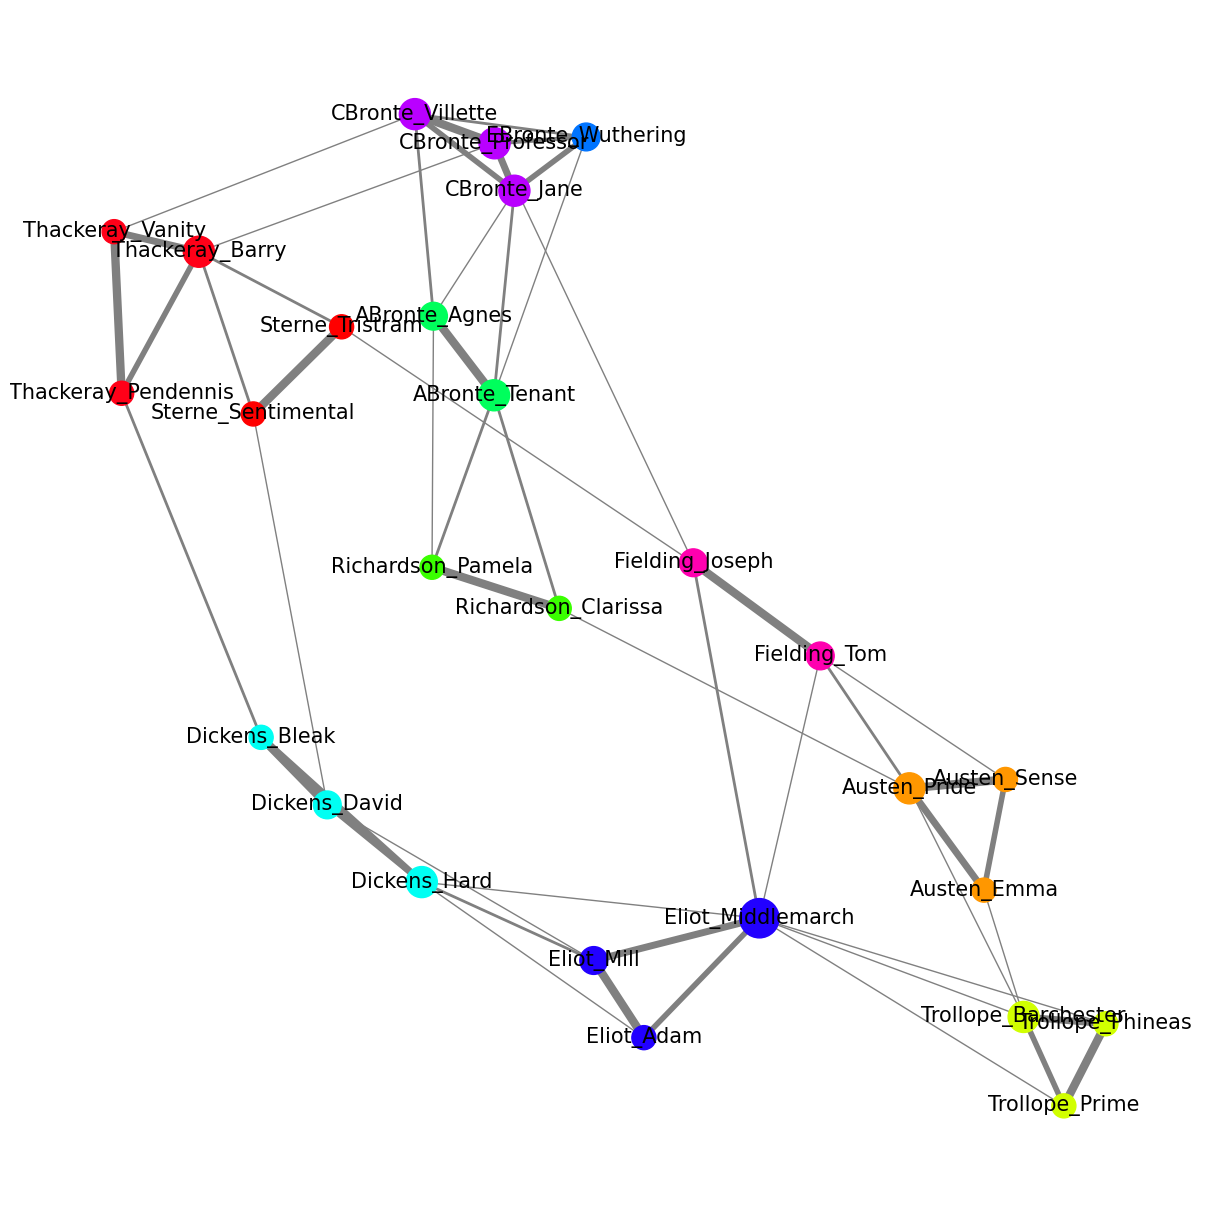

In [9]:
# Resultat aus Stylo einlesen und als Netzwerk aufgeben 

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# CSV File laden
file_path = 'britishFiction_CA_100_MFWs_Culled_0__Classic Delta_EDGES.csv'  
data = pd.read_csv(file_path)

# Graph erstellen
G = nx.Graph()

# Kanten aus dem DataFrame hinzufügen
for index, row in data.iterrows():
    G.add_edge(row['Source'], row['Target'], weight=row['Weight'])

#Knotengröße
node_size = [G.degree(node) * 100 for node in G.nodes()]

# Kantenstärke basierend auf der Gewichtung
edge_thickness = [G[u][v]['weight'] for u, v in G.edges()]

# Knotenfarbe basierend auf Gradzentralität
# node_color = [G.degree(node) for node in G.nodes()]

# Gruppennamen extrahieren und Farben zuweisen
group_names = set(node.split('_')[0] for node in G.nodes())
colors = plt.cm.get_cmap('hsv', len(group_names))
group_color_map = {group: colors(i) for i, group in enumerate(group_names)}
node_color = [group_color_map[node.split('_')[0]] for node in G.nodes()]


# Graph zeichnen
plt.figure(figsize=(12, 12))
nx.draw_spring(G, with_labels=True, node_color=node_color, node_size=node_size, 
        edge_color='gray', width=edge_thickness, linewidths=1, font_size=15
        ) #cmap=plt.cm.magma


# Als .png speichern
plt.savefig('enhanced_network_graph.png')

# Plot erstellen
plt.show()
